In [101]:
import pandas as pd
import numpy  as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [120]:
df = pd.read_csv("datasets/CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Описание датасета
| Название колонки       | Описание                                                                 | Тип данных   |
|---------------------------|-------------------------------------------------------------------------|--------------|
| **Car_ID**                | Уникальный идентификатор наблюдения                                     | Integer      |
| **Symboling**             | Рейтинг страхового риска (-3 безопасный, +3 рискованный)                | Categorical  |
| **CarName**               | Название машины                                                         | Categorical  |
| **fueltype**              | Тип топлива (газ/дизель)                                                | Categorical  |
| **aspiration**            | Тип впуска (турбо/стандартный)                                          | Categorical  |
| **doornumber**            | Количество дверей                                                       | Categorical  |
| **carbody**               | Тип кузова                                                              | Categorical  |
| **drivewheel**            | Тип привода (передний/задний/полный)                                    | Categorical  |
| **enginelocation**        | Расположение двигателя (переднее/заднее)                                | Categorical  |
| **wheelbase**             | Колесная база (длина между центрами колес)                              | Numeric      |
| **carlength**             | Длина автомобиля                                                        | Numeric      |
| **carwidth**              | Ширина автомобиля                                                       | Numeric      |
| **carheight**             | Высота автомобиля                                                       | Numeric      |
| **curbweight**            | Вес автомобиля без пассажиров и груза                                   | Numeric      |
| **enginetype**            | Тип двигателя                                                           | Categorical  |
| **cylindernumber**        | Количество цилиндров                                                    | Categorical  |
| **enginesize**            | Объем двигателя                                                         | Numeric      |
| **fuelsystem**            | Система подачи топлива                                                  | Categorical  |
| **boreratio**             | Соотношение диаметра цилиндра к ходу поршня                             | Numeric      |
| **stroke**                | Ход поршня                                                              | Numeric      |
| **compressionratio**      | Степень сжатия                                                          | Numeric      |
| **horsepower**            | Мощность двигателя (л.с.)                                               | Numeric      |
| **peakrpm**               | Максимальное количество оборотов в минуту                               | Numeric      |
| **citympg**               | Расход топлива в городе (миль на галлон)                                | Numeric      |
| **highwaympg**            | Расход топлива на трассе (миль на галлон)                               | Numeric      |
| **price**                 | Цена автомобиля (целевая переменная)                                    | Numeric      |

# Предобработка

In [121]:
target = df.price
df.drop(['car_ID', 'CarName', 'price'], axis=1, inplace=True)

In [122]:
df.isna().sum()

symboling           0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
dtype: int64

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

In [124]:
df.nunique()

symboling             6
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
dtype: int64

In [125]:
categ = [
    'symboling',
    'fueltype',
    'aspiration',
    'doornumber',
    'carbody',
    'drivewheel',
    'enginelocation',
    'enginetype',
    'cylindernumber',
    'fuelsystem'
]

In [126]:
cont = [col for col in df.columns if col not in categ]

In [127]:
cont

['wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg']

In [128]:
categ_dummies = [
    'fueltype',
    'aspiration',
    'doornumber',
    'enginelocation',
    'carbody',
    'drivewheel',
    'enginetype',
    'fuelsystem'
]

In [129]:
df.symboling.unique() # no need in lable encoder

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

In [130]:
df.cylindernumber.unique() 

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [131]:
df = pd.get_dummies(df, columns=categ_dummies, drop_first=True)

In [132]:
df.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,...,False,False,False,False,False,False,False,True,False,False
1,3,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,...,False,False,False,False,False,False,False,True,False,False
2,1,94.5,171.2,65.5,52.4,2823,six,152,2.68,3.47,...,False,True,False,False,False,False,False,True,False,False
3,2,99.8,176.6,66.2,54.3,2337,four,109,3.19,3.40,...,False,False,False,False,False,False,False,True,False,False
4,2,99.4,176.6,66.4,54.3,2824,five,136,3.19,3.40,...,False,False,False,False,False,False,False,True,False,False


In [133]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.cylindernumber = le.fit_transform(df.cylindernumber)

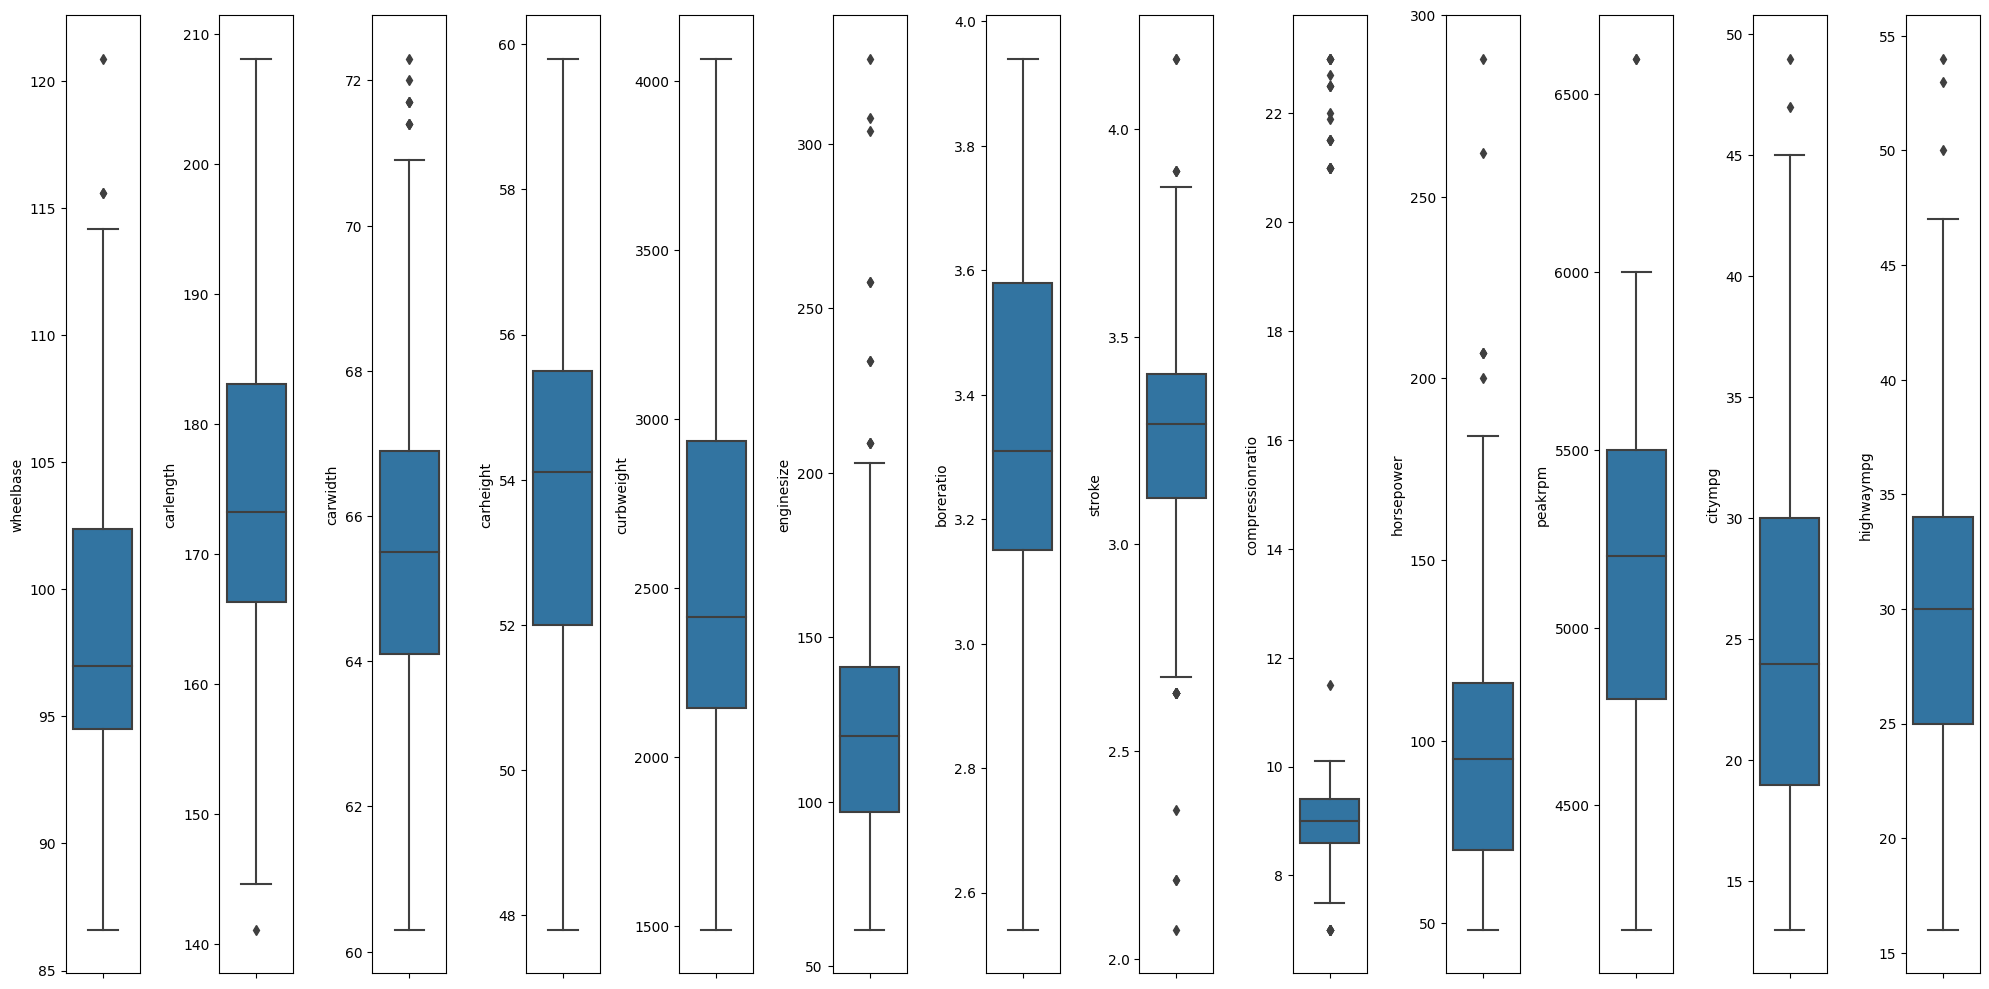

In [134]:
fig = plt.figure(figsize=(20,10))

for i, name in enumerate(cont):
    ax = fig.add_subplot(1,len(cont), i+1)
    sns.boxplot(y=df[name], ax=ax)

fig.tight_layout()

In [135]:
from sklearn.preprocessing import QuantileTransformer

In [136]:
qt = QuantileTransformer(n_quantiles=10, random_state=0) # гауссово распр чуть лучше, чем нормальное
df[cont] = qt.fit_transform(df[cont])

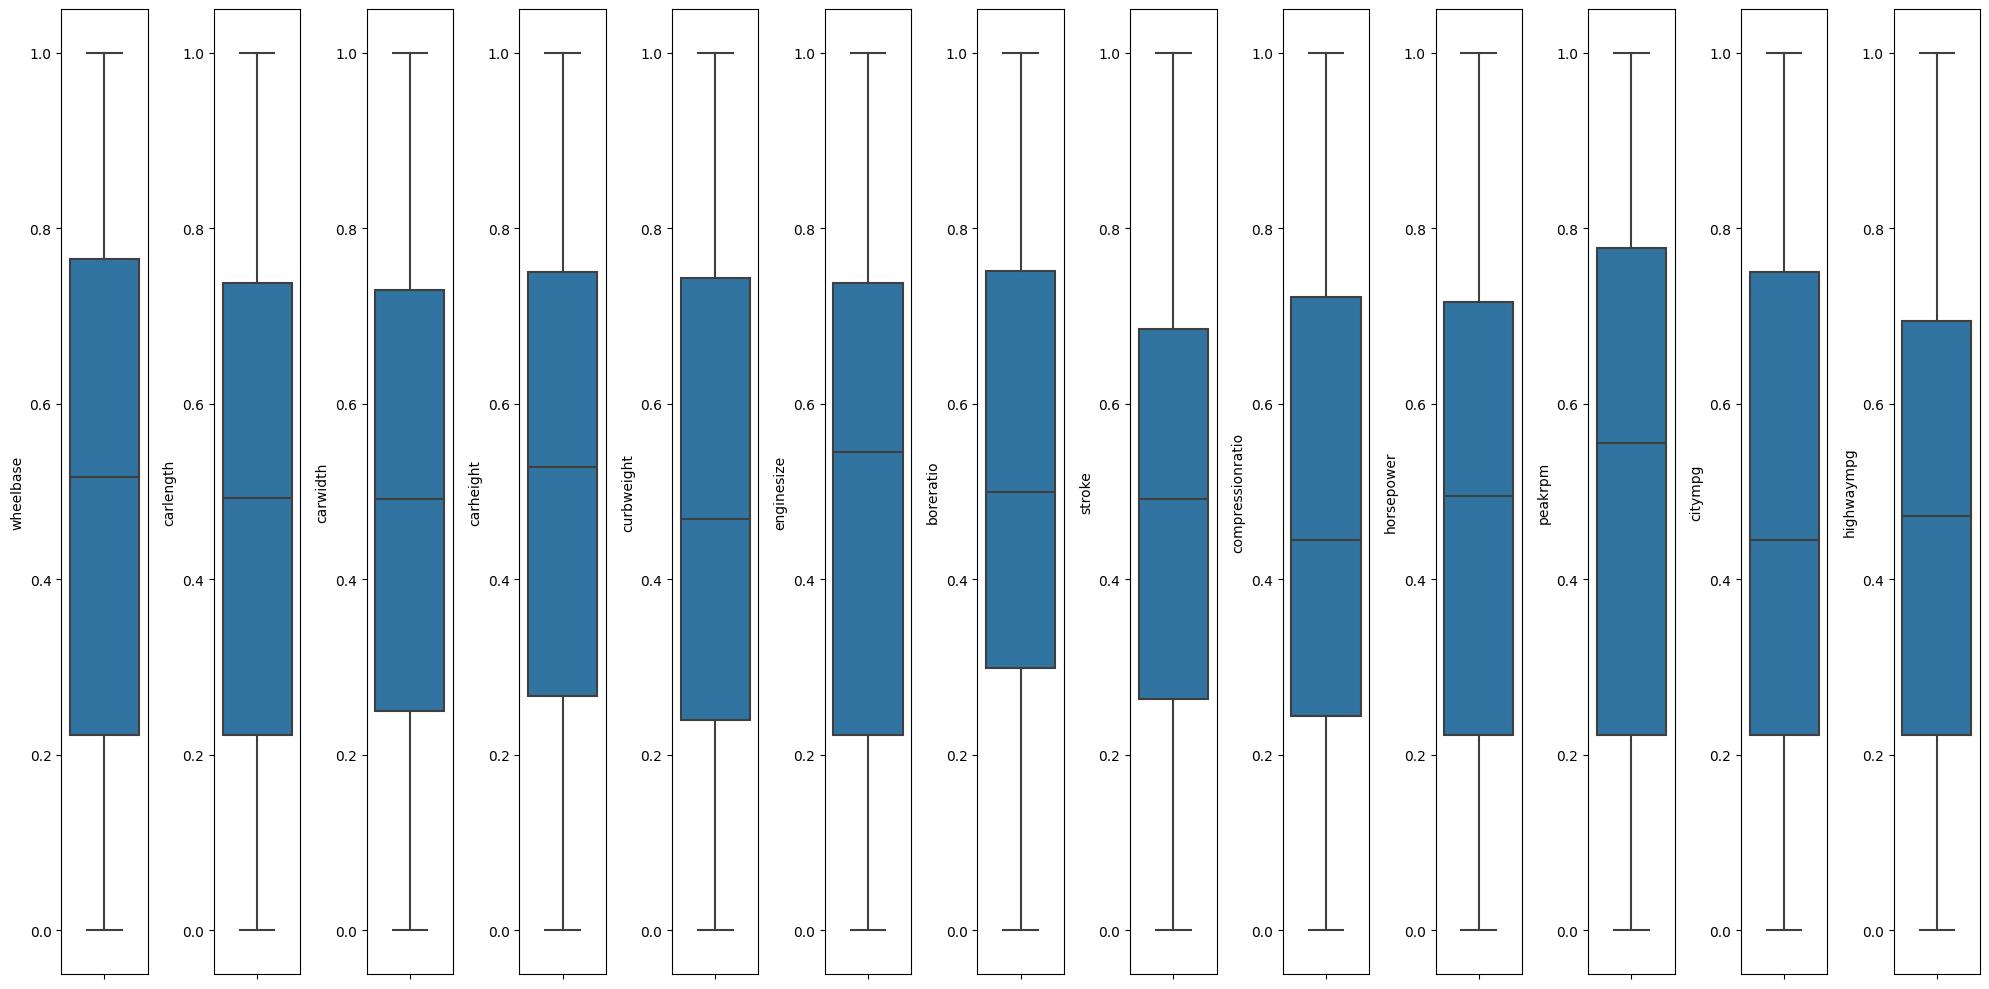

In [137]:
fig = plt.figure(figsize=(20,10))

for i, name in enumerate(cont):
    ax = fig.add_subplot(1,len(cont), i+1)
    sns.boxplot(y=df[name], ax=ax)

fig.tight_layout()

<Axes: >

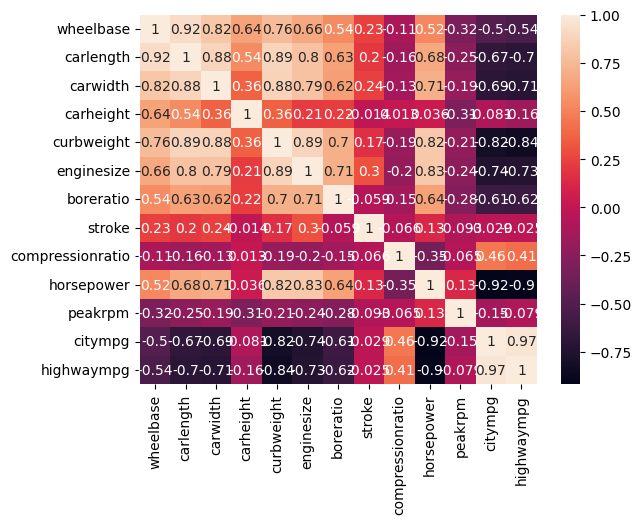

In [138]:
corr = df[cont].corr()
sns.heatmap(corr, annot=True)

In [151]:
df.drop(['carlength', 'wheelbase', 'carwidth', 'citympg'], axis=1, inplace=True)

In [165]:
new_cont = [col for col in cont if col not in ['carlength', 'wheelbase', 'carwidth', 'citympg']]

<Axes: >

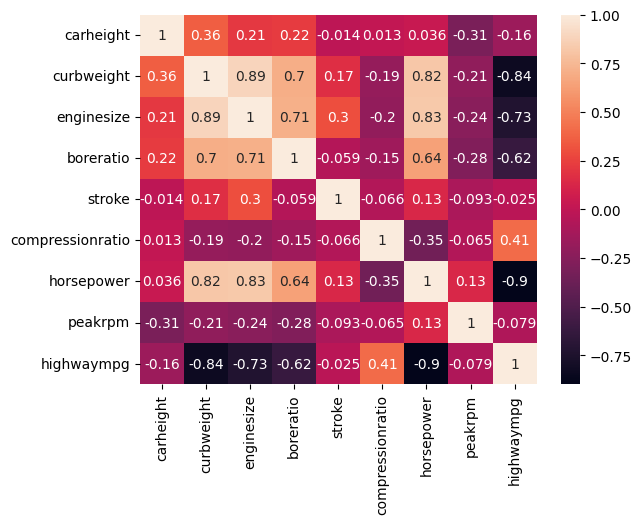

In [166]:
corr = df[new_cont].corr()
sns.heatmap(corr, annot=True)

C:\Users\papul.DESKTOP-U29R0P8.000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Распределение цены')

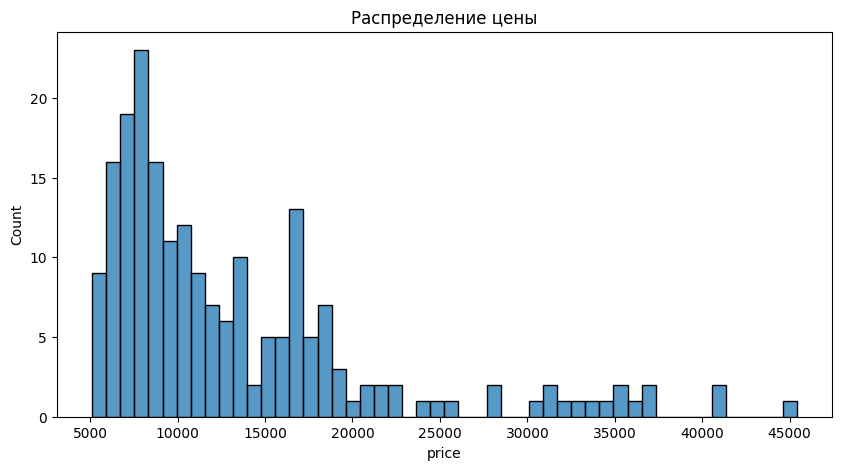

In [152]:
plt.figure(figsize=(10, 5))
sns.histplot(target, bins=50)
plt.title('Распределение цены')

In [153]:
from sklearn.model_selection import train_test_split

In [154]:
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=42)

# Линейная регрессия с регуляризацией L2

In [155]:
from sklearn import linear_model

In [156]:
alphas = np.logspace(1, 2, 100)  # 100 значений в логарифмической шкале
reg_ridge = linear_model.RidgeCV(alphas=alphas, cv=10)

In [157]:
reg_ridge = linear_model.RidgeCV()

In [158]:
reg_ridge.fit(X_train, y_train);

In [159]:
reg_ridge.score(X_test, y_test)

0.6827758820685395

In [160]:
reg_ridge.alpha_

1.0

In [161]:
reg_ridge.coef_

array([ -141.27192925,   447.52693099,  9884.33336904, -1314.90268259,
        3002.44640878, -1141.93984399, -1934.94245075,  -401.88907737,
        4038.14801035,  1267.73424476, -5156.56019931, -1505.09023901,
        -739.843987  ,   210.00658875,  9681.48419441,  1260.00871862,
       -1804.43542228,  -271.9772295 , -3363.50871854,  1552.53984525,
        3801.95533214,  3442.87316262, -4200.23291131,  -142.74507338,
         277.231993  ,  2901.14676911,  2622.52335226,   277.03990084,
         432.10387755,  1505.09023901, -1372.4184452 ,  -771.50781184,
       -2467.92351414, -2392.47550087])

In [162]:
reg_ridge.intercept_

11498.45879930578

# Линейная регрессия с регуляризацией L1

In [170]:
reg_lasso = linear_model.LassoCV(alphas=alphas, cv=10)

In [171]:
reg_lasso.fit(X_train,y_train);
reg_lasso.score(X_test,y_test)

0.6844393653702504

In [172]:
reg_lasso.coef_

array([   -0.        ,     0.        , 14229.50449737, -1021.55942534,
           0.        ,    -0.        ,    -0.        ,   209.64465307,
         844.99039374,   187.31004231, -3385.42729506,    -0.        ,
          -0.        ,     0.        , 12762.08705649,     0.        ,
       -1298.36559898,     0.        , -3226.85726371,     0.        ,
        2664.17835611,     0.        , -4210.68279649,  -165.59529462,
          -0.        ,  3048.0284266 ,     0.        ,    -0.        ,
           0.        ,     0.        ,    -0.        ,     0.        ,
        -946.84212243,    -0.        ])

In [174]:
ind = np.array(range(34))
nnzero = ind[np.abs(reg_lasso.coef_)>0.01]

In [175]:
df.columns[nnzero]

Index(['curbweight', 'cylindernumber', 'compressionratio', 'horsepower',
       'peakrpm', 'highwaympg', 'enginelocation_rear', 'carbody_hatchback',
       'carbody_wagon', 'drivewheel_rwd', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcv', 'fuelsystem_spdi'],
      dtype='object')

In [176]:
reg_ridge.intercept_

11498.45879930578

# Линейная регрессия ElasticNet

In [177]:
l1_ratio = np.linspace(1e-2,1,20)

In [178]:
reg_elasticnet = linear_model.ElasticNetCV(cv=10,
                                           alphas=alphas,
                                           l1_ratio=l1_ratio,
                                           max_iter=10000,
                                           random_state=42)

In [179]:
reg_elasticnet.fit(X_train,y_train);

In [180]:
reg_elasticnet.score(X_test,y_test)

0.6844393653702504

In [181]:
reg_elasticnet.alpha_

55.90810182512222

In [182]:
reg_elasticnet.l1_ratio_


1.0

In [183]:
reg_elasticnet_2 = linear_model.ElasticNetCV(cv=10,
                                           alphas=[56],
                                           l1_ratio=[1],
                                           max_iter=10000,
                                           random_state=42)

In [184]:
reg_elasticnet_2.fit(X_train,y_train);
reg_elasticnet_2.score(X_test,y_test)

0.6844500771475808